In [7]:
import cv2
import mediapipe as mp
import numpy as np
import joblib # pkl 모델 사용

import pandas as pd
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

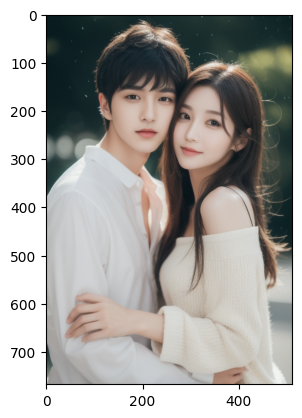

In [8]:
model = joblib.load('model/pred_face_direction_rf.pkl')

mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

image = cv2.imread('test_images/00069-3282616193.png')
# image = cv2.imread('00013-606592912.png')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

##### Face_detection 적용

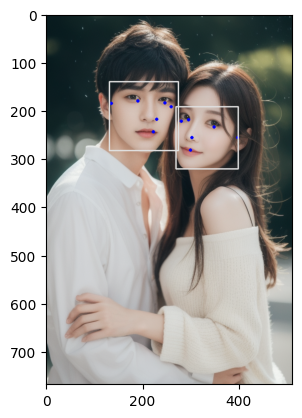

In [9]:
with mp_face_detection.FaceDetection(
    model_selection=0, min_detection_confidence=0.5) as face_detection:
     
    results = face_detection.process(image)
    if results.detections:
      for detection in results.detections:
        mp_drawing.draw_detection(image, detection)
    
    plt.imshow(image)

##### image를 통한 모델 예측 결과 확인

left


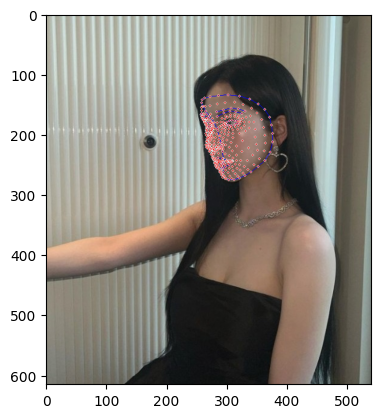

In [10]:
image = cv2.imread('test_images/left_3.jpg')
# image = cv2.imread('00069-3282616193.png')
# image = cv2.imread('00013-606592912.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    result = holistic.process(image)
    mp_drawing.draw_landmarks(image,
                              result.face_landmarks,
                              mp_holistic.FACEMESH_CONTOURS,
                              mp_drawing.DrawingSpec(color=(255,0,0), thickness=1, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(0,0,255), thickness=1, circle_radius=1))
    face = result.face_landmarks.landmark
    face_list = []
    for temp in face:
        face_list.append([temp.x, temp.y, temp.z])
    face_row = list(np.array(face_list).flatten())

    X = pd.DataFrame([face_row])

    class_name = ['front', 'left', 'right']
    yhat = model.predict(X)[0]
    yhat = class_name[yhat]
    print(yhat)

    plt.imshow(image)

In [11]:
def pred_face_direction(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        result = holistic.process(image)
        mp_drawing.draw_landmarks(image,
                                result.face_landmarks,
                                mp_holistic.FACEMESH_CONTOURS,
                                mp_drawing.DrawingSpec(color=(255,0,0), thickness=1, circle_radius=1),
                                mp_drawing.DrawingSpec(color=(0,0,255), thickness=1, circle_radius=1))
        face = result.face_landmarks.landmark
        face_list = []
        for temp in face:
            face_list.append([temp.x, temp.y, temp.z])
        face_row = list(np.array(face_list).flatten())

        X = pd.DataFrame([face_row])

        class_name = ['front', 'left', 'right']
        yhat = model.predict(X)[0]
        yhat = class_name[yhat]
        
        return yhat

In [12]:
image = cv2.imread('./test_images/left_3.jpg')

pred_face_direction(image)

'left'